# EDA on Times Series Dataset

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
location = data.iloc[:, 17:] # only location column considered
location[['time']] = data[['time']]
# print(used.columns)
row_diffs = location.set_index('time').diff() 
#location.head()

In [3]:
row_diffs = row_diffs[row_diffs.columns].apply(abs) # convert all difference between rows to abs for sum up

In [5]:
row_diffs['diff_sum'] = row_diffs[list(row_diffs.columns)].sum(axis=1)

<AxesSubplot:xlabel='time'>

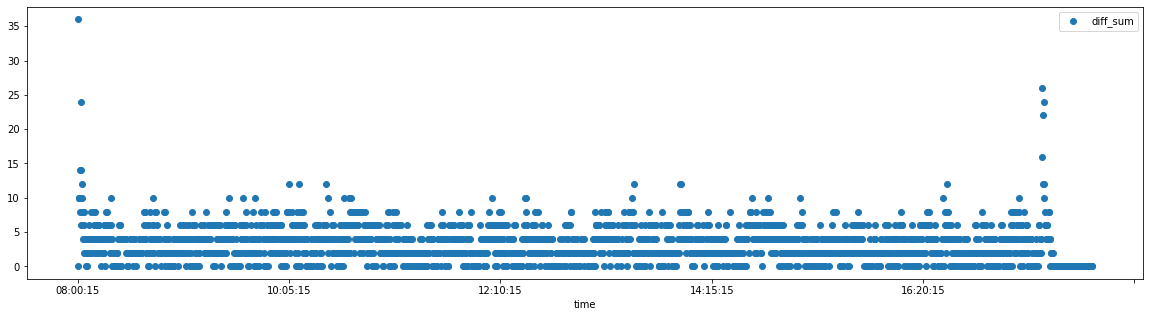

In [6]:
row_diffs.plot(y='diff_sum', style='o', use_index=True, figsize=(20,5))


In [7]:
row_diffs.nlargest(10, 'diff_sum')['diff_sum'] # among all

time
08:00:30    36.0
17:30:45    26.0
08:02:15    24.0
17:31:45    24.0
17:31:00    22.0
17:30:30    16.0
08:01:30    14.0
08:02:00    14.0
08:02:45    12.0
10:05:30    12.0
Name: diff_sum, dtype: float64

In [24]:
first_30min = row_diffs[:120]
first_30min.nlargest(10, 'diff_sum')['diff_sum']

time
08:00:30    36.0
08:02:15    24.0
08:01:30    14.0
08:02:00    14.0
08:02:45    12.0
08:00:45    10.0
08:01:00    10.0
08:01:15    10.0
08:03:00    10.0
08:20:15    10.0
Name: diff_sum, dtype: float64

In [1]:
last_40min = row_diffs[-120:] # last 20min
last_40min.nlargest(10, 'diff_sum')['diff_sum']

NameError: name 'row_diffs' is not defined

In [39]:
last_20min = row_diffs[-120:] # last 20min
last_20min.nsmallest(10, 'diff_sum')['diff_sum']

time
17:35:15    0.0
17:36:15    0.0
17:36:45    0.0
17:37:15    0.0
17:37:30    0.0
17:37:45    0.0
17:38:00    0.0
17:38:15    0.0
17:38:30    0.0
17:38:45    0.0
Name: diff_sum, dtype: float64

In [34]:
last_20min = row_diffs[-80:] # last 20min
last_20min.nlargest(10, 'diff_sum')['diff_sum']

time
17:40:30    0.0
17:40:45    0.0
17:41:00    0.0
17:41:15    0.0
17:41:30    0.0
17:41:45    0.0
17:42:00    0.0
17:42:15    0.0
17:42:30    0.0
17:42:45    0.0
Name: diff_sum, dtype: float64

In [64]:
row_diffs[:10]

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,r33,r34,r35,c1,c2,c3,c4,o1,outside,diff_sum
time,,,,,,,,,,,,,,,,,,,,,
08:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
08:00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,36.0
08:00:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
08:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,10.0
08:01:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0
08:01:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,14.0
08:01:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,8.0
08:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,14.0
08:02:15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,8.0,4.0,0.0,2.0,2.0,0.0,24.0


In [6]:
state = [0]*40
state.append(20)
import numpy as np
np.array(state)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 20])

In [41]:
data[40:-72] 

,Unnamed: 0,reliable_sensor1,reliable_sensor2,reliable_sensor3,reliable_sensor4,unreliable_sensor1,unreliable_sensor2,unreliable_sensor3,unreliable_sensor4,robot1,...,r32,r33,r34,r35,c1,c2,c3,c4,o1,outside
40,40,no motion,motion,no motion,motion,no motion,motion,motion,no motion,"('r30', 0)",...,0,1,0,0,0,0,2,2,0,0
41,41,motion,motion,motion,motion,no motion,motion,no motion,no motion,"('r30', 0)",...,0,1,0,0,1,0,1,2,0,0
42,42,motion,motion,motion,motion,motion,motion,no motion,no motion,"('r29', 0)",...,0,1,0,0,1,0,1,2,1,0
43,43,motion,no motion,no motion,motion,motion,motion,no motion,no motion,"('r30', 0)",...,0,1,0,0,0,1,1,2,1,0
44,44,motion,no motion,no motion,motion,motion,motion,no motion,no motion,"('r30', 0)",...,0,1,0,0,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2324,no motion,no motion,no motion,no motion,motion,no motion,no motion,no motion,"('c1', 0)",...,0,0,0,0,0,0,0,0,0,21
2325,2325,no motion,no motion,no motion,motion,no motion,no motion,no motion,motion,"('c1', 0)",...,0,0,0,0,0,0,0,0,0,21
2326,2326,no motion,no motion,no motion,no motion,no motion,no motion,no motion,no motion,"('c1', 0)",...,0,0,0,0,0,0,0,0,0,21
2327,2327,no motion,no motion,no motion,no motion,no motion,no motion,no motion,motion,"('c1', 0)",...,0,0,0,0,0,0,0,0,0,21
